# HMM build and analysis

Here we will construct and analyze HMM models using MSA as the input data. We will utilize several databases as sources to enhance our analysis and gain valuable insights from the generated HMM profiles.


In [112]:
import os
import re
import json
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import ipywidgets as widgets
from functions import *

In [113]:
# Set the path
local_path = os.getcwd()

In [114]:
# Create a dataframe from curated.mjson
data = list()

with open('curated.mjson', 'r') as file:
    for line in file:
        obj = json.loads(line)
        rows = json_parser(obj)
        data.extend(rows)

curated_disprot = pd.DataFrame(data)

# Calculate the length of disordered regions
curated_disprot['length'] = curated_disprot['end'] - curated_disprot['start'] + 1
curated_disprot = curated_disprot[(curated_disprot['feature'] == 'disorder') & (curated_disprot['source'] == 'disprot')]

print(f"The number of the Curated Disprot database instances: {len(curated_disprot)}")
curated_disprot.head(5)

The number of the Curated Disprot database instances: 3151


,acc,evidence,feature,source,start,end,length
6927,P03265,curated,disorder,disprot,294,334,41
6928,P03265,curated,disorder,disprot,454,464,11
6929,P49913,curated,disorder,disprot,134,170,37
6930,P03045,curated,disorder,disprot,1,107,107
6931,P00004,curated,disorder,disprot,1,105,105


In [110]:
# Upload the dataframe with the disordered regions only
disordered = pd.read_csv("disordered_df.csv")
disordered.head()

,query_id,subject_id,query_len,hsp_len,query_seq,match_seq,subject_seq,query_start,query_end,subject_start,subject_end,identity,positive,gaps,eval,bit_score,count
0,Q9H832,A0A6J2FM24,354,356,MAESPTEEAATA--GAGAAGPGASSVAGVVGVSGSGGGFGPPFLPD...,MAESPTEEAATA GAGAAGPGAS V GVVGVSGSG FGPPFLPD...,MAESPTEEAATATAGAGAAGPGASGVTGVVGVSGSG--FGPPFLPD...,1,354,1,354,350,350,4,0.0,1851.0,200
1,Q9H832,A0A3Q7W6Y2,354,356,MAESPTEEAATA--GAGAAGPGASSVAGVVGVSGSGGGFGPPFLPD...,MAESPTEEAATA GAGA GPGAS VAGVVGVSGSG FGPPFLPD...,MAESPTEEAATATAGAGATGPGASGVAGVVGVSGSG--FGPPFLPD...,1,354,1,354,350,350,4,0.0,1851.0,200
2,Q9H832,A0A2U3VK69,354,356,MAESPTEEAATA--GAGAAGPGASSVAGVVGVSGSGGGFGPPFLPD...,MAESPTEEAATA GAGAAGPGAS V GVVGVSGSG FGPPFLPD...,MAESPTEEAATATAGAGAAGPGASGVTGVVGVSGSG--FGPPFLPD...,1,354,1,354,350,350,4,0.0,1851.0,200
3,Q9H832,A0A2Y9JVH5,354,358,MAESPTEEAATA----GAGAAGPGASSVAGVVGVSGSGGGFGPPFL...,MAESPTEEAATA GAGAAGPGAS VAGVVGVSGSG FGPPFL...,MAESPTEEAATATATAGAGAAGPGASGVAGVVGVSGSG--FGPPFL...,1,354,1,356,351,351,6,0.0,1854.0,200
4,Q9H832,A0A8C7ALE4,354,358,MAESPTEEAATA----GAGAAGPGASSVAGVVGVSGSGGGFGPPFL...,MAESPTEEAATA GAGAAGPGAS VAGVVGVSGSG FGPPFL...,MAESPTEEAATATATAGAGAAGPGASGVAGVVGVSGSG--FGPPFL...,1,354,1,356,351,351,6,0.0,1854.0,200


In [10]:
# Dropdown list of query IDs for disordered regions
output = widgets.Select(
    options=disordered["query_id"].unique(),
    rows=10,
    description='Query ID: ',
    layout={'width': 'max-content'},
    disabled=False
)
display(output)

Select(description='Query ID: ', layout=Layout(width='max-content'), options=('Q9H832', 'Q8IW19', 'Q99967', 'Q…

In [323]:
# Input parameters
q_id = output.value
name = 'alina'
server = 'ecate'
i = 1 # change the number if there are several regions in one MSA
hmm_file = f'{local_path}/results/disordered/hmmbuild/{q_id}_{i}.hmm'
align_file = f'{local_path}/results/alignments/output_files/disordered/{q_id}_{i}.fasta'

In [324]:
# Filter the curated_disprot dataframe based on selected_id
filtered_curated = curated_disprot[curated_disprot['acc'] == q_id]
filtered_curated.head(5)

,acc,evidence,feature,source,start,end,length
7799,Q9H832,curated,disorder,disprot,1,99,99
7800,Q9H832,curated,disorder,disprot,327,354,28


Using the MSA in .fasta format as an input data, we generate HMM model with `hmmbuild` command.

In [325]:
# Build HMM 
!hmmbuild {hmm_file} {align_file}

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             /Users/alina/HMM/results/alignments/output_files/disordered/Q9H832_1.fasta
# output HMM file:                  /Users/alina/HMM/results/disordered/hmmbuild/Q9H832_1.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     Q9H832_1               201    99    99     2.96  0.590 

# CPU time: 0.04u 0.01s 00:00:00.05 Elapsed: 00:00:00.05


Here we should pay attention at the occasional difference between the values of `alen` and `mlen` which stand for aligned sequence and consensus sequence lengths respectfully. If they differ, we handle the sequences with the deletions.

In [326]:
# Analysis of the model
!hmmstat {hmm_file}

# hmmstat :: display summary statistics for a profile file
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
#
# idx  name                 accession        nseq eff_nseq      M relent   info p relE compKL
# ---- -------------------- ------------ -------- -------- ------ ------ ------ ------ ------
1      Q9H832_1             -                 201     2.96     99   0.59   0.61   0.54   0.06


In this part, we analyze the statistics of the generated HMM and focus on key metrics:
- `eff_nseq`: effective sequence number. The smaller value is suggesting a relatively low similarity among the sequences.
- `relent`: relative entropy of the match state. The value is 0.59, indicating a moderate conservation of residues.
- `compKL`: Kullback-Leibler divergence from the average composition. The value is low, indicating a better alignment fit with the background model. 

## 1. HMMsearch

After building the model, our objective is to assess if overlaps with the profiles in Reference Proteome exist. Then, we enrich the model by utilizing a protein database such as the Reference Proteome. For both databases, we generate dataframes containing the most significant sequences, utilizing a default E-value threshold of 0.01.

### Reference Proteome

The objective here is to enhance the quality of the model by conducting additional model training using a larger set of homologous sequences.

In [299]:
# Copy the file to remote computer
!scp {local_path}/results/disordered/hmmbuild/{q_id}_{i}.hmm {name}@{server}:~/{q_id}_{i}.hmm

Q8IW19_2.hmm                                  100%   29KB   6.6MB/s   00:00    


In [303]:
# HMM search against Reference Proteome 15%
!ssh {name}@{server} "/software/packages/hmmer/hmmer-3.3.2/usr/bin/hmmsearch {q_id}_{i}.hmm /db/rp/rp-seqs-15.fasta.gz > hmmsearch_rp_15_{q_id}_{i}.txt"

In [304]:
# HMM search against Reference Proteome 75%
!ssh {name}@{server} "/software/packages/hmmer/hmmer-3.3.2/usr/bin/hmmsearch {q_id}_{i}.hmm /db/rp/rp-seqs-75.fasta.gz > hmmsearch_rp_75_{q_id}_{i}.txt"

In [305]:
# Copy results to the local folder
!scp {name}@{server}:~/hmmsearch_rp_15_{q_id}_{i}.txt {local_path}/results/disordered/hmmsearch/
!scp {name}@{server}:~/hmmsearch_rp_75_{q_id}_{i}.txt {local_path}/results/disordered/hmmsearch/

hmmsearch_rp_15_Q8IW19_2.txt                  100%   61KB   6.1MB/s   00:00    
hmmsearch_rp_75_Q8IW19_2.txt                  100%  525KB  10.3MB/s   00:00    


In [306]:
# Retrieve a dataframe with the statistics of the RP 15%
stats_rp_15 = process_hmmsearch_file(f"{local_path}/results/disordered/hmmsearch/hmmsearch_rp_15_{q_id}_{i}.txt")
stats_rp_15.to_csv(f"{local_path}/results/disordered/hmmsearch/stats/stats_rp_15_{q_id}_{i}.csv")
stats_rp_15

The total number of Reference Proteome hits: 27, the number of unique sequences: 27


,E-value,score,bias,E-value,score,bias,exp,N,Sequence,Description
0,2.9e-32,119.6,20.4,2.9e-32,119.6,20.4,2.5,2,Q8IW19,APLF_HUMAN^|^^|^Aprataxin and PNK-like factor {EC
1,7.4e-32,118.3,20.4,7.4e-32,118.3,20.4,2.3,1,A0A2K5VR45,A0A2K5VR45_MACFA^|^^|^Aprataxin and PNKP like fac
2,9.2e-28,105.2,25.4,3.4e-27,103.4,25.4,2.0,1,A0A2K6T215,A0A2K6T215_SAIBB^|^^|^Aprataxin and PNKP like fac
3,1.2e-26,101.6,12.5,3.1e-26,100.3,12.5,1.7,1,S9WGV8,S9WGV8_CAMFR^|^^|^zf-CCHH domain-containing prote
4,4.3e-22,87.0,16.7,5.6e-22,86.7,16.7,1.1,1,A0A2I0TBL0,A0A2I0TBL0_LIMLA^|^^|^Uncharacterized protein {EC
5,7.2e-22,86.3,18.3,7.2e-22,86.3,18.3,2.8,2,E1BU46,E1BU46_CHICK^|^^|^Uncharacterized protein {ECO:00
6,7.3e-22,86.3,18.3,7.3e-22,86.3,18.3,2.8,2,A0A3Q2TSM9,A0A3Q2TSM9_CHICK^|^^|^Uncharacterized protein {EC
7,3.5e-21,84.1,21.3,3.5e-21,84.1,21.3,2.2,1,M7B3V9,M7B3V9_CHEMY^|^^|^Aprataxin and PNK-like factor {
8,2.3e-17,71.9,19.3,3.6e-17,71.3,19.3,1.3,1,A0A2G9SCZ2,A0A2G9SCZ2_LITCT^|^^|^Uncharacterized protein {EC
9,3.3e-17,71.4,18.6,1e-16,69.8,18.6,1.9,1,A0A8I6AU35,A0A8I6AU35_RAT^|^^|^Aprataxin and PNKP like facto


In [327]:
# Retrieve a dataframe with the statistics of the RP 75%
stats_rp_75 = process_hmmsearch_file(f"{local_path}/results/disordered/hmmsearch/hmmsearch_rp_75_{q_id}_{i}.txt")
stats_rp_75.to_csv(f"{local_path}/results/disordered/hmmsearch/stats/stats_rp_75_{q_id}_{i}.csv")
stats_rp_75

The total number of Reference Proteome hits: 289, the number of unique sequences: 289


,E-value,score,bias,E-value,score,bias,exp,N,Sequence,Description
0,1.4e-46,169.6,18.6,2.2e-46,168.9,18.6,1.4,1,K7BAZ7,K7BAZ7_PANTR^|^^|^Ubiquitin conjugating enzyme E2
1,1.4e-46,169.6,18.6,2.2e-46,168.9,18.6,1.4,1,Q9H832,UBE2Z_HUMAN^|^^|^Ubiquitin-conjugating enzyme E2
2,1.5e-46,169.4,18.5,2.4e-46,168.7,18.5,1.4,1,A0A2K5RV48,A0A2K5RV48_CEBIM^|^^|^Ubiquitin conjugating enzym
3,1.5e-46,169.4,18.5,2.4e-46,168.7,18.5,1.4,1,A0A6J3I1K6,A0A6J3I1K6_SAPAP^|^^|^ubiquitin-conjugating enzym
4,1.5e-46,169.4,18.5,2.4e-46,168.7,18.5,1.4,1,A0A8I5UEF8,A0A8I5UEF8_PONAB^|^^|^Ubiquitin conjugating enzym
...,...,...,...,...,...,...,...,...,...,...
284,0.0067,29.4,0.4,0.0086,29.0,0.4,1.2,1,A0A851F956,A0A851F956_PITSO^|^^|^UBE2Z enzyme {ECO:0000313|E
285,0.0071,29.3,4.5,0.012,28.6,4.5,1.4,1,A0A6G0HWG6,A0A6G0HWG6_LARCR^|^^|^Ubiquitin-conjugating enzym
286,0.0081,29.1,2.0,0.014,28.4,2.0,1.4,1,A0A7N8YCX3,A0A7N8YCX3_9TELE^|^^|^Ubiquitin-conjugating enzym
287,0.0083,29.1,1.0,0.019,27.9,1.0,1.6,1,A0A6P5JNS4,A0A6P5JNS4_PHACI^|^^|^LOW QUALITY PROTEIN: ubiqui


In [309]:
# Copy again the new files to the remote computer
!scp {local_path}/results/disordered/hmmsearch/stats/stats_rp_15_{q_id}_{i}.csv {name}@{server}:~/stats_rp_15_{q_id}_{i}.csv
!scp {local_path}/results/disordered/hmmsearch/stats/stats_rp_75_{q_id}_{i}.csv {name}@{server}:~/stats_rp_75_{q_id}_{i}.csv

stats_rp_15_Q8IW19_2.csv                      100% 2874     2.0MB/s   00:00    
stats_rp_75_Q8IW19_2.csv                      100%   53KB   5.7MB/s   00:00    


In [290]:
# Check the overlapping of the retrieved regions in RP and those from protein2ipr database
# !ssh {name}@{server} "/home/alina/protein2ipr_iterator.py stats_rp_15_{q_id}_{i}.csv /db/interpro/protein2ipr.dat.gz protein2ipr_rp_15_{q_id}_{i}.txt"

In [310]:
!ssh {name}@{server} "/home/alina/priter.py stats_rp_15_{q_id}_{i}.csv /db/interpro/protein2ipr.dat.gz protein2ipr_rp_15_{q_id}_{i}.txt"

In [311]:
# Copy the files with overlapping regions to the local folder
!scp {name}@{server}:~/protein2ipr_rp_15_{q_id}_{i}.txt {local_path}/results/disordered/hmmsearch/protein2ipr

protein2ipr_rp_15_Q8IW19_2.txt                100% 7266     1.4MB/s   00:00    


In [328]:
data = []
with open(f"{local_path}/results/disordered/hmmsearch/protein2ipr/protein2ipr_rp_15_{q_id}_{i}.txt") as file:
    for line in file:
        row = line.strip().split("\t")
        if len(row) >= 5:
            uniprot_id = row[0]
            ipr_id = row[1]
            description = row[2]
            pfam_id = row[3]
            start_pos = row[4]
            end_pos = row[5]

            if pfam_id.startswith("PF"):
                data.append([uniprot_id, ipr_id, description, pfam_id, start_pos, end_pos])

# Create a DataFrame from the collected data
pfam = pd.DataFrame(data, columns=["uniprot_id", "ipr_id", "description", "pfam_id", "start_pos", "end_pos"])
pfam["start_pos"] = pd.to_numeric(pfam["start_pos"])
pfam["end_pos"] = pd.to_numeric(pfam["end_pos"])
pfam['length'] = pfam['end_pos'] - pfam['start_pos'] + 1
print(f"The number of unique Pfam IDs for a {q_id}_{i} disordered region:", len(set(pfam['pfam_id'])))
print("The number of hits:", len(pfam))
pfam

The number of unique Pfam IDs for a Q9H832_1 disordered region: 1
The number of hits: 6


,uniprot_id,ipr_id,description,pfam_id,start_pos,end_pos,length
0,A0A2K5VU74,IPR000608,Ubiquitin-conjugating enzyme E2,PF00179,90,218,129
1,A0A4Z2GIF1,IPR000608,Ubiquitin-conjugating enzyme E2,PF00179,133,264,132
2,A0A7N9CX17,IPR000608,Ubiquitin-conjugating enzyme E2,PF00179,103,231,129
3,Q3B7D1,IPR000608,Ubiquitin-conjugating enzyme E2,PF00179,105,233,129
4,Q3UE37,IPR000608,Ubiquitin-conjugating enzyme E2,PF00179,105,233,129
5,Q9H832,IPR000608,Ubiquitin-conjugating enzyme E2,PF00179,103,231,129


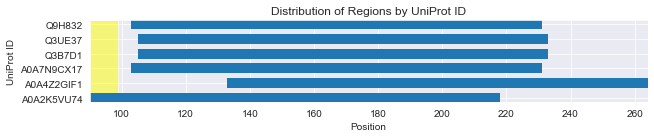

In [331]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 0.25 * len(pfam['uniprot_id'].unique())))

# Get the unique Pfam IDs
unique_pfam_ids = pfam['pfam_id'].unique()

# Check the number of unique Pfam IDs
if len(unique_pfam_ids) == 1:
    # Only one unique Pfam ID
    pfam_id = unique_pfam_ids[0]

    # Filter the data for the specific Pfam ID
    data = pfam[pfam['pfam_id'] == pfam_id]

    # Plot the region as a horizontal line segment
    ax.hlines(data['uniprot_id'], data['start_pos'], data['end_pos'], linewidth=10)

    # Set the y-axis tick labels as UniProt IDs
    ax.set_yticks(data['uniprot_id'])
    ax.set_yticklabels(data['uniprot_id'])
else:
    # Multiple unique Pfam IDs
    for pfam_id in unique_pfam_ids:
        # Filter the data for the current Pfam ID
        data = pfam[pfam['pfam_id'] == pfam_id]

        # Plot the region as horizontal line segments
        ax.hlines(data['uniprot_id'], data['start_pos'], data['end_pos'], linewidth=10)

    # Set the y-axis ticks as the UniProt IDs
    ax.set_yticks(range(len(pfam['uniprot_id'].unique())))
    ax.set_yticklabels(pfam['uniprot_id'].unique())

# Set the x-axis limits based on the maximum start and end positions
ax.set_xlim(pfam['start_pos'].astype(int).min(), pfam['end_pos'].astype(int).max())

# Add the background color for the region of interest
start_pos = filtered_curated['start'].iloc[0] # 0 if 1st region, 1 if 2nd
end_pos = filtered_curated['end'].iloc[0] # 0 if 1st region, 1 if 2nd
ax.axvspan(start_pos, end_pos, facecolor='yellow', alpha=0.5)

# Set the plot title and axis labels
plt.title('Distribution of Regions by UniProt ID')
plt.xlabel('Position')
plt.ylabel('UniProt ID')

# Show the plot
plt.show()

## 2. HHblits

HHblits is used for profile-profile sequence alignment. It compares a profile against a target sequence database to find homologous sequences.

In [19]:
!scp {align_file} alina@{server}:~/{q_id}_{i}.fasta

Q9H832_1.fasta                                100%   22KB   4.5MB/s   00:00    


In [20]:
# HHblits against Pfam
!ssh {name}@{server} "/software/packages/hhsuite/hhsuite-3.0-beta.3-Linux/bin/hhblits -i {q_id}_{i}.fasta -o hhblits_pfam_{q_id}_{i}.txt -d /db/hhblits/pfamA_35.0/pfam" # against Pfam HMM database

- 10:15:37.215 INFO: Searching 19632 column state sequences.

- 10:15:37.323 INFO: Q9H832_1.fasta is in A2M, A3M or FASTA format

- 10:15:37.326 INFO: Iteration 1

- 10:15:37.417 INFO: Prefiltering database

- 10:15:37.558 INFO: HMMs passed 1st prefilter (gapless profile-profile alignment)  : 100

- 10:15:37.559 INFO: HMMs passed 2nd prefilter (gapped profile-profile alignment)   : 100

- 10:15:37.559 INFO: HMMs passed 2nd prefilter and not found in previous iterations : 100

- 10:15:37.559 INFO: Scoring 100 HMMs using HMM-HMM Viterbi alignment

- 10:15:37.597 INFO: Alternative alignment: 0

- 10:15:38.062 INFO: 100 alignments done

- 10:15:38.062 INFO: Stop after DB-HHM: 100 because early stop  0.53099 < filter cutoff 1

- 10:15:38.062 INFO: Alternative alignment: 1

- 10:15:38.063 INFO: 2 alignments done

- 10:15:38.063 INFO: Alternative alignment: 2

- 10:15:38.063 INFO: Alternative alignment: 3

- 10:15:38.081 INFO: No new hits found in iteration 1 => Stop searching

- 10:15:38.081

In [21]:
!ssh {name}@{server} "/software/packages/hhsuite/hhsuite-3.0-beta.3-Linux/bin/hhblits -i {q_id}_{i}.fasta -o hhblits_rp_15_{q_id}_{i}.txt -d /db/rp/rp-seqs-15.fasta.gz"

- 10:15:40.928 ERROR: In /home/mmeier/hh-suite/src/hhdatabase.cpp:35: FFindexDatabase:

- 10:15:40.928 ERROR: 	could not open file '/db/rp/rp-seqs-15.fasta.gz_cs219.ffdata'



In [22]:
# Copy results to the local folder
!scp {name}@{server}:~/hhblits_rp_15_{q_id}_{i}.txt {local_path}/results/disordered/hhblits/

scp: ~/hhblits_rp_15_Q9H832_1.txt: No such file or directory


- `Hit`: contains information about Pfam identifier (starts with PF...), the abbreviated and full name of the domain.
- `Prob`: the probability of the match between the query sequence and the template sequence.
- `E-value`: the expected number of false positive matches that could occur by chance.
- `P-value`: the probability of obtaining a match with a score as good as or better than the observed score purely by chance.
Similar as `E-value`, the lower `P-value` indicate more significant matches.
- `Score`: the quality of the alignment between the query and template sequences.
- `SS (Secondary Structure)`: the predicted secondary structure of the aligned residues in the template sequence.
- `Cols`: the number of aligned columns or residues in the alignment between the query and template sequences.
- `Query HMM`: indicates position matches within HMM profile (input).
- `Template HMM`: indicates position matches within HMM profile (database).
Usually the length of template HMM is bigger than the length of query HMM.

In [23]:
with open(f'{local_path}/results/disordered/hhblits/hhblits_rp_15_{q_id}_{i}.txt', 'r') as file:
    lines = file.readlines()

# Extract the column names
column_names = lines[8].split()[:-4] + ['Query HMM', 'Template HMM']

# Extract the data rows
data_rows = [line.split() for line in lines[9:19]] 
data_rows = [[row[0]] + [' '.join(row[1:4])] + row[7:14] + [' '.join(row[14:16])] 
             for row in data_rows]

# Create the DataFrame
hhblits_stats = pd.DataFrame(data_rows, columns=column_names)
hhblits_stats[["Hit", "Name"]] = hhblits_stats["Hit"].str.split(" ; ", expand=True)
print(f"The total number of HHblits hits on Pfam: {len(hhblits_stats)}, the number of unique domains: {hhblits_stats.Hit.nunique()}")
hhblits_stats

The total number of HHblits hits on Pfam: 10, the number of unique domains: 10


,No,Hit,Prob,E-value,P-value,Score,SS,Cols,Query HMM,Template HMM,Name
0,1,PF15773.8,22.9,4.1,0.0009,22.7,0.0,13,7-19,15-27 (504),DAAP1
1,2,PF19869.2,13.6,11,0.0021,18.0,0.0,21,8-28,3-23 (99),DUF6342
2,3,PF15761.8,17,0.0032,17.0,0.0,7,9-15,50-56,(101),IMUP
3,4,PF07055.15,0.0041,14.9,0.0,9,20-28,1-9,(64),,Eno-Rase_FAD_bd
4,5,PF13066.9,24,0.0041,15.7,0.0,10,17-26,39-48,(64),DUF3929
5,6,PF15201.9,32,0.0057,14.6,0.0,10,16-25,37-46,(54),Rod_cone_degen
6,7,PF15337.9,37,0.0074,15.1,0.0,11,9-19,84-95,(98),Vasculin
7,8,PF15551.9,4.0,52,0.01,17.8,0.0,14,12-25,339-352 (359),DUF4656
8,9,PF17702.4,3.9,61,0.011,16.4,0.0,11,18-28,102-112 (177),DUF5548
9,10,PF10976.11,53,0.011,13.2,0.0,5,21-25,60-64,(78),DUF2790
